In [12]:
import pandas as pd
from ord_data_load import draw_reaction_rand
from ord_data_load import ORD_PATH, ORD_REPO_PATH

In [13]:
all_reactions = pd.read_pickle(f'{ORD_PATH}/all_reactions.pkl')

In [3]:
# all Palladium containing reactions as catalyst
pd_cat = all_reactions.reaction_smile.str.contains('Pd').fillna(False)
pd_cat.sum()

132729

In [4]:
# containing palladium/Pd keyword in notes
pd_notes = all_reactions.notes.str.contains(r'Pd|[Pp]all?ad').fillna(False)
pd_notes.sum()

155574

In [5]:
# what are preceding chars (for future tokenization)
pre = all_reactions.notes.str.extract(r'(.)(?=[Pp]allad)')[0]
pre

0            i
1            i
2            i
3            i
4             
          ... 
1790143    NaN
1790144    NaN
1790145    NaN
1790146    NaN
1790147    NaN
Name: 0, Length: 1790148, dtype: object

In [6]:
pre_unique = pre.dropna().value_counts()
pre_unique

     53517
)    23229
i     6236
o     3588
-     2985
]     1449
e      888
y      318
(       73
l       72
n       37
s       36
/       18
}        9
—        4
,        3
r        3
[        3
0        1
.        1
"        1
%        1
_        1
Name: 0, dtype: int64

#### '/' ####
Reaction: 12
Solvent: [['petroleum ether', None]]
Catalyst [['palladium/calcium carbonate', '[Pd]']]


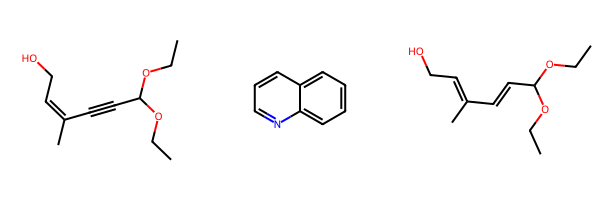

198 g. of 1,1-diethoxy-4-methyl-4-hexen-2-yn-6-ol are hydrogenated in the usual manner in the presence of 35 g. of a lead/palladium/calcium carbonate catalyst, 5 ml. of quinoline and 1500 ml. of high boiling petroleum ether. There is obtained 1,1-diethoxy-4-methyl-2,4-hexadien-6-ol of boiling point 96°-98° (0.01 mm.); nD20 = 1.4730 - 1.4760.


In [7]:
pre_char = pre_unique.index.values[12]
print(f"#### '{pre_char}' ####")
draw_reaction_rand(all_reactions[pre == pre_char], notes_text='allad')

In [8]:
# Single letter regex mistake
s = 'alladium'
regex_pattern = ''
for i in range(len(s)):
    print(s[:i] + f'[^{s[i]}]' + s[i+1:])
    regex_pattern += s[:i] + f'[^{s[i]}]' + s[i+1:] + '|'
regex_pattern = regex_pattern[:-1]
regex_pattern

[^a]lladium
a[^l]ladium
al[^l]adium
all[^a]dium
alla[^d]ium
allad[^i]um
alladi[^u]m
alladiu[^m]


'[^a]lladium|a[^l]ladium|al[^l]adium|all[^a]dium|alla[^d]ium|allad[^i]um|alladi[^u]m|alladiu[^m]'

In [9]:
pd_mistakes = all_reactions.notes.str.contains(f'{regex_pattern}').fillna(False)
pd_mistakes.sum()

75

Reaction: 17
Solvent: [['ethyl acetate', 'C(C)(=O)OCC']]
Catalyst []


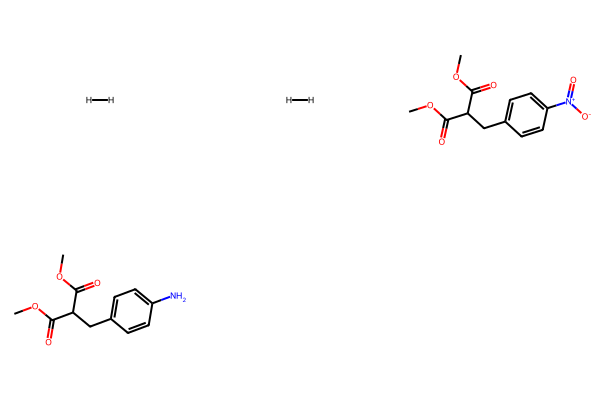

The compound 2-carbomethoxy-3-(4-nitrophenyl)propanoic acid methyl ester (p-nitrobenzyl malonate dimethyl ester) (2.00 g, 7.55 mmole) was dissolved in 70 ml of ethyl acetate containing 5 percent palladiunm on carbon (1.0 g-Aldrich Chemical Company) catalyst and was hydrogenated in a Parr shaker employing 50 psig of hydrogen at 22° C. Hydrogen uptake was rapid (15 minutes) and the mixture was maintained under hydrogen pressure for another three hours. The pressure vessel was vented and flushed with nitrogen (N2). The suspension was filtered through a pad of celite and the solvent was removed in vacuo using a rotary evaporator to provide 3-(4-aminophenyl)-2-carbomethoxypropanoic acid methyl ester (p-aminobenzylmalonate dimethyl ester) (1.76 g, 7.41 mmole) as a light yellow oil in 98 percent yield. The structure was confirmed by 1H nuclear magnetic resonance (PNMR) and 13C nuclear magnetic resonance (CMR) as well as mass spectroscopy (MS) spectral analysis.


In [10]:
draw_reaction_rand(all_reactions[pd_mistakes & ~pd_cat], notes_text='dium')

In [11]:
pd_df = all_reactions[pd_cat | pd_notes | pd_mistakes]
len(pd_df)

156269

In [14]:
%%time
pd.to_pickle(pd_df, f'{ORD_PATH}/pd_df.pkl')

CPU times: total: 1.73 s
Wall time: 1.74 s


In [15]:
pd_df = pd.read_pickle(f'{ORD_PATH}/pd_df.pkl')

Reaction: 90540
Solvent: [['triethylamine', 'C(C)N(CC)CC']]
Catalyst [['dichlorobis(triphenylphosphine)palladium', 'Cl[Pd]([P](C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3)([P](C4=CC=CC=C4)(C5=CC=CC=C5)C6=CC=CC=C6)Cl'], ['copper iodide', '[Cu](I)I']]


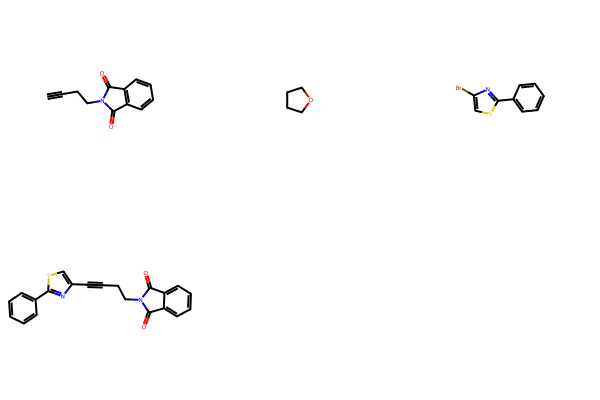

To 221 mg of dichlorobis(triphenylphosphine)palladium, 60 mg of copper iodide, and 1.24 g of N-(3-butynyl)phthalimide were added 15 ml of tetrahydrofuran, 1.50 g of the 2-phenyl-4-bromothiazole obtained in the foregoing stage, and 3.8 ml of triethylamine in a nitrogen atmosphere, and the mixture was stirred under reflux for 4 hours. After the stifling, the reaction mixture was cooled to room temperature and the solids were filtered. After concentrating the filtrate, the residue was purified by column chromatography (Wakogel C-200; toluene:ethyl acetate=9:1) to give 1.24 g of a phthalimide compound.


In [47]:
draw_reaction_rand(pd_df, notes_text='alladium')